In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [2]:
os.chdir(r'C:/Users/neelk/Downloads/Data Scientist Assessment/data')

In [3]:
starcraft = pd.read_csv('starcraft_player_data.csv')
starcraft

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


# Preprocessing

In [4]:
def missing_val_check(data):
    # Missing data check
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat(
        [total, percent * 100], axis=1, keys=["Total", "Percent(%)"]
    )
    return missing_data

In [5]:
missing_val_check(starcraft)

,Total,Percent(%)
GameID,0,0.0
LeagueIndex,0,0.0
ComplexUnitsMade,0,0.0
UniqueUnitsMade,0,0.0
WorkersMade,0,0.0
TotalMapExplored,0,0.0
ActionsInPAC,0,0.0
ActionLatency,0,0.0
GapBetweenPACs,0,0.0
NumberOfPACs,0,0.0


In [6]:
# Check for duplicate records
print(starcraft.duplicated().sum())

0


#### We can see that there is "?" in the dataset in coloumns Age, HoursPerWeek and TotalHours and its not being counted as a null value. So we need to account for this by changing the "?" as null values. We also see that these are mostly in the league index 8.

In [7]:
inval_dtypecol = ["Age", "HoursPerWeek", "TotalHours"]

# Replacing '?' as null value
starcraft[inval_dtypecol] = starcraft[inval_dtypecol].apply(lambda x: x.replace("?", np.nan))

# Converting the dtype of these features to numeric
for col in inval_dtypecol:
    starcraft[col] = pd.to_numeric(starcraft[col])

In [8]:
missing_val_check(starcraft)

,Total,Percent(%)
TotalHours,57,1.678940
HoursPerWeek,56,1.649485
Age,55,1.620029
GameID,0,0.000000
GapBetweenPACs,0,0.000000
ComplexUnitsMade,0,0.000000
UniqueUnitsMade,0,0.000000
WorkersMade,0,0.000000
TotalMapExplored,0,0.000000
ActionsInPAC,0,0.000000


#### After handling the "?" , we can see that Age, TotalHours and HoursperWeek are missing and roughly 1% of the data is missing, which can be simply imputed. Lets fix the missing values of Age, Hoursperweek and TotalHours by imuputing them with the medians of League Index 7 as their attributes would most likely be the closest to the original for the League Index 8.

In [9]:
med_val = starcraft[starcraft["LeagueIndex"] == 7]["Age"].median()
starcraft["Age"] = starcraft["Age"].fillna(med_val)

In [10]:
med_val = starcraft[starcraft["LeagueIndex"] == 7]["HoursPerWeek"].median()
starcraft["HoursPerWeek"] = starcraft["HoursPerWeek"].fillna(med_val)

In [11]:
med_val = starcraft[starcraft["LeagueIndex"] == 7]["TotalHours"].median()
starcraft["TotalHours"] = starcraft["TotalHours"].fillna(med_val)

In [12]:
missing_val_check(starcraft)

,Total,Percent(%)
GameID,0,0.0
LeagueIndex,0,0.0
ComplexUnitsMade,0,0.0
UniqueUnitsMade,0,0.0
WorkersMade,0,0.0
TotalMapExplored,0,0.0
ActionsInPAC,0,0.0
ActionLatency,0,0.0
GapBetweenPACs,0,0.0
NumberOfPACs,0,0.0


#### Missing data is handled. 

# EDA

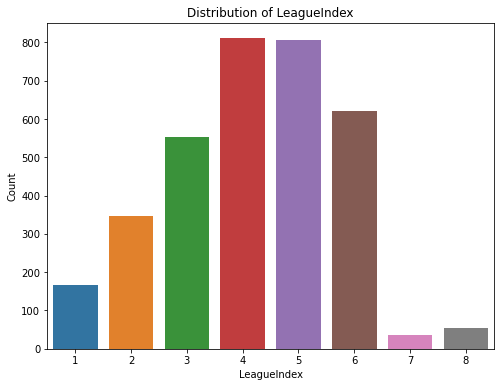

In [13]:
# Target Variable Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='LeagueIndex', data=starcraft)
plt.title('Distribution of LeagueIndex')
plt.xlabel('LeagueIndex')
plt.ylabel('Count')
plt.show()

#### The distribution of league index follows a normal distribution. But the data we have for league index 7 and 8 are relatively less which could hurt our model.

In [14]:
numerical_features = ['Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys',
                      'UniqueHotkeys', 'MinimapAttacks', 'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs',
                      'ActionLatency', 'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
                      'ComplexUnitsMade', 'ComplexAbilitiesUsed']

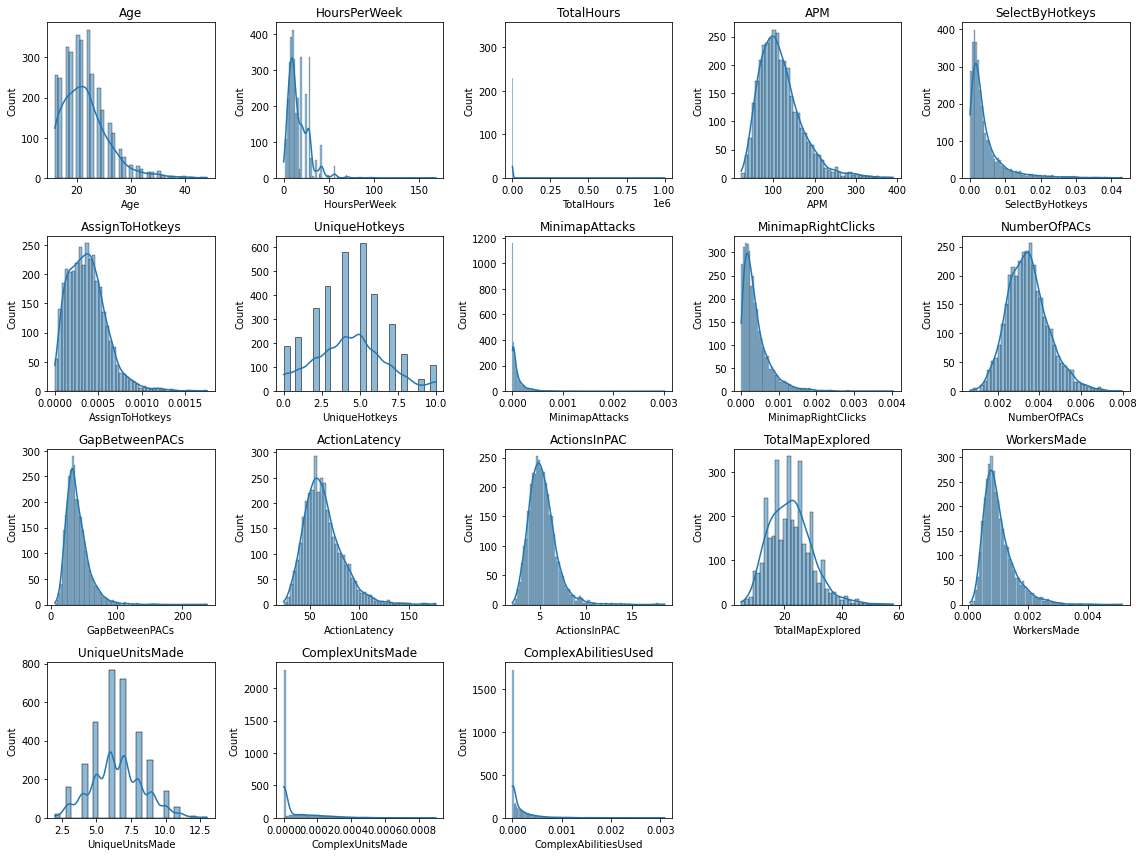

In [15]:
# Distribution Analysis
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 5, i+1)
    sns.histplot(starcraft[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

#### We can observe skewness in most of the attributes. But we are going to build models which are generally less sensitive to the skewness of continuous variables and may not require explicit skewness reduction

### Outlier detection

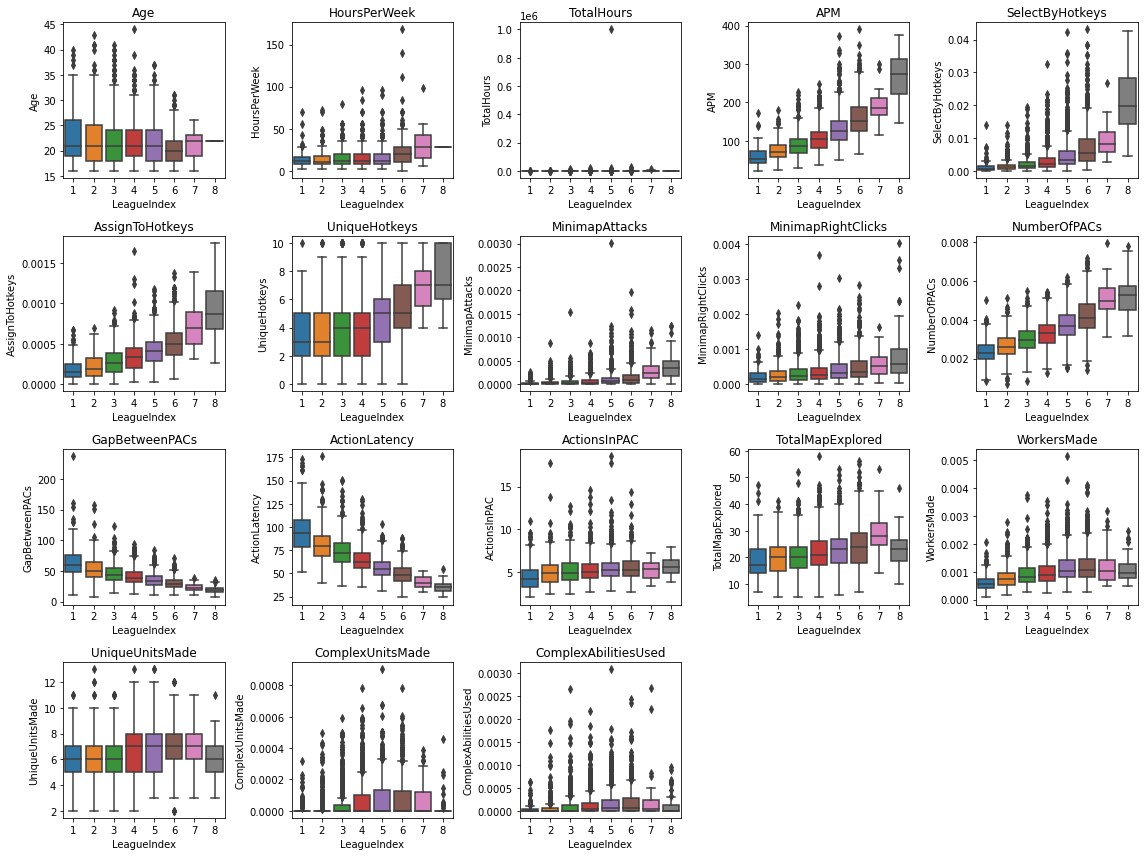

In [16]:
# Feature Relationships
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 5, i+1)
    sns.boxplot(x='LeagueIndex', y=feature, data=starcraft)
    plt.title(feature)
plt.tight_layout()
plt.show()

####  The data contains identifiable outliers, some of which may be genuine while others may be input errors. Treating outliers is a crucial step that requires verification with the business before making any decisions. If we encounter values that are clearly impossible, we can address them directly.

#### An example of an outlier is the value 168 for HoursPerWeek, which equals 24 hours multiplied by 7 days. It is impossible for any player to play 24 hours a day, 7 days a week. Considering that players need a break per day, we will replace all values greater than 154 with 154.

#### Another anomaly is TotalHours, which amounts to 1,000,000 hours. This value clearly appears to be an outlier. Considering that the average total hours played by a player is 6,720, we acknowledge that some players may play for longer durations. With a reasonable margin, we will replace values greater than 25,000 hours with 25,000. It is important to validate this with a large dataset of players' historical total hours played to obtain a more accurate value for our model's fit.

#### Additionally, there are outlier player attributes, which can be expected since some players possess exceptional reflexes and other abilities.

In [17]:
#Replacing the hoursperweek values with values greater than 154 as 154
starcraft.loc[starcraft["HoursPerWeek"] > 154, "HoursPerWeek"] = 154

#Replacing anomolous Total hours as mentioned in the takeaway above
starcraft.loc[starcraft["TotalHours"] > 25000, "TotalHours"] = 25000

### Multicollinearity check

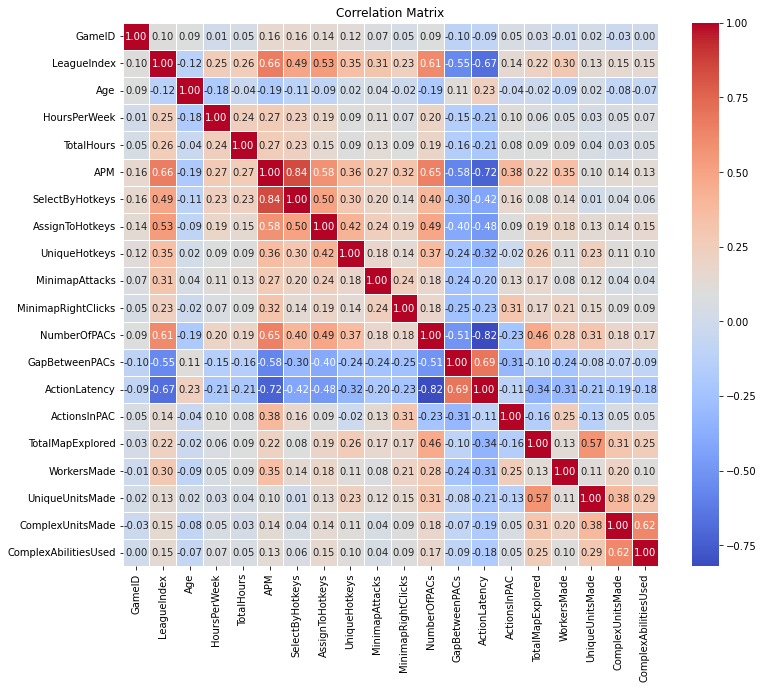

In [18]:
corr_matrix = starcraft.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Takeaways based on EDA:

Action latency significantly seems to have significant negetive correlation with our target variable. This is kind of very obvious that lower the action latency a player has, the better the player is and better the chances to be playing in higer leagues.

Total hours/ hours per week seems to have decent correlation value with our target. The hypothesis here is that more practise a player does, the better he performs in the leagues and has more chances to be in the higher leagues. Although its alone not significant.

AssignToHotKeys have a correlation value of 0.53 with the target. This implies that player having higher number of units or buildings assigned to hotkeys per timestamp have better chances to play in the higer leagues.
Minimapattacks, WorkersMade also have high correlation hence can be an important predictor for our target

#### We can also observe multicollinearity exists and it is needed to be handled. And we will be using VIF to remove it.

In [19]:
starcraft_indp = starcraft.drop(["LeagueIndex"], axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = starcraft_indp.columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(starcraft_indp.values, i)
    for i in range(len(starcraft_indp.columns))
]

In [20]:
vif_data

,feature,VIF
0,GameID,4.344672
1,Age,29.907473
2,HoursPerWeek,3.262569
3,TotalHours,1.696670
4,APM,232.258720
5,SelectByHotkeys,23.244008
6,AssignToHotkeys,6.504405
7,UniqueHotkeys,5.906443
8,MinimapAttacks,1.583259
9,MinimapRightClicks,2.637323


As a general rule of thumb VIF > 10 implies series multicollinearity amongst the features which requires serious checks. This means there is serious multicollinearity in our game data.

Removing ActionsinPAC and UniqueUnitsMade as we can see in the heatmap above this feature is weakly correlated with our target but has high VIF. Also we can remove SelectByHotkeys as this is highly correlated with AssignToHotkeys where AssignToHotkeys is better correlated with our target.

Also we can remove APM as this is clearly highly correlated with ActionLatency and ActionLatency is slighly more correlated to our target. Also APM have significantly high VIF value

NumberOfPACs is highly correlated to Action Latency. Also GapBetweenPACs is highly correlated with NumberOfPACs. Also TotalMapExplored is highly correlated with Action Latency and ComplexUnitsMade. Hence we remove NumberofPACs, GapBetweenPACs , TotalMapExplored and recheck our VIF scores

In [21]:
starcraft_indp = starcraft_indp.drop(["ActionsInPAC","UniqueUnitsMade","SelectByHotkeys","APM","NumberOfPACs","TotalMapExplored","GapBetweenPACs",],axis=1,)
vif_data = pd.DataFrame()
vif_data["feature"] = starcraft_indp.columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(starcraft_indp.values, i)
    for i in range(len(starcraft_indp.columns))
]
vif_data.sort_values(["VIF"], ascending=False)

,feature,VIF
1,Age,21.850211
8,ActionLatency,12.183878
5,UniqueHotkeys,5.428009
4,AssignToHotkeys,5.227502
9,WorkersMade,5.020461
0,GameID,4.188378
2,HoursPerWeek,2.953398
7,MinimapRightClicks,2.313747
10,ComplexUnitsMade,2.156936
11,ComplexAbilitiesUsed,2.101678


#### We can still see that still Age having high VIF factor. As most of the variance from Age variable is explained by other features, we can remove Age without losing significant information for our model but will keep it for now

Removing unnecessary coloumn "GameID"

In [22]:
starcraft_indp = starcraft_indp.drop(["GameID"], axis = 1)

## We finally have our cleaned, preprocessed dataset - starcraft_indp

In [23]:
starcraft_indp

,Age,HoursPerWeek,TotalHours,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,ActionLatency,WorkersMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,27.0,10.0,3000.0,0.000220,7,0.000110,0.000392,40.8673,0.001397,0.000000,0.000000
1,23.0,10.0,5000.0,0.000259,4,0.000294,0.000432,42.3454,0.001193,0.000000,0.000208
2,30.0,10.0,200.0,0.000336,4,0.000294,0.000461,75.3548,0.000745,0.000000,0.000189
3,19.0,20.0,400.0,0.000213,1,0.000053,0.000543,53.7352,0.000426,0.000000,0.000384
4,32.0,10.0,500.0,0.000327,2,0.000000,0.001329,62.0813,0.001174,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...
3390,22.0,28.0,1250.0,0.000743,9,0.000621,0.000146,42.8342,0.000877,0.000000,0.000000
3391,22.0,28.0,1250.0,0.001157,10,0.000246,0.001083,36.1156,0.000788,0.000000,0.000000
3392,22.0,28.0,1250.0,0.000860,7,0.000338,0.000169,39.5156,0.001260,0.000000,0.000000
3393,22.0,28.0,1250.0,0.000594,5,0.000204,0.000780,34.8547,0.000613,0.000000,0.000631


# Model Building

In [24]:
X = starcraft_indp
y = starcraft['LeagueIndex']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_params = {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]}
dt_grid_search = GridSearchCV(dt_classifier, dt_params, cv=10)
dt_grid_search.fit(X_train, y_train)
dt_best_params = dt_grid_search.best_params_
dt_best_model = dt_grid_search.best_estimator_

In [27]:
rf_classifier = RandomForestClassifier()
rf_params = {'n_estimators': [100, 200, 500], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
rf_grid_search = GridSearchCV(rf_classifier, rf_params, cv=10)
rf_grid_search.fit(X_train, y_train)
rf_best_params = rf_grid_search.best_params_
rf_best_model = rf_grid_search.best_estimator_

svm_classifier = SVC()
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid_search = GridSearchCV(svm_classifier, svm_params, cv=10)
svm_grid_search.fit(X_train, y_train)
svm_best_params = svm_grid_search.best_params_
svm_best_model = svm_grid_search.best_estimator_

In [29]:
nn_classifier = MLPClassifier()
nn_params = {'hidden_layer_sizes': [(100,), (100, 100), (50, 50, 50)], 'activation': ['relu', 'tanh']}
nn_grid_search = GridSearchCV(nn_classifier, nn_params, cv=10)
nn_grid_search.fit(X_train, y_train)
nn_best_params = nn_grid_search.best_params_
nn_best_model = nn_grid_search.best_estimator_

# Model Evaluation

In [30]:
dt_accuracy = dt_best_model.score(X_test, y_test)
rf_accuracy = rf_best_model.score(X_test, y_test)
#svm_accuracy = svm_best_model.score(X_test, y_test)
nn_accuracy = nn_best_model.score(X_test, y_test)

In [31]:
# Print the best parameters and accuracy for each model
print("Decision Tree:")
print("Best Parameters:", dt_best_params)
print("Accuracy:", dt_accuracy)

print("\nRandom Forest:")
print("Best Parameters:", rf_best_params)
print("Accuracy:", rf_accuracy)


print("\nNeural Network:")
print("Best Parameters:", nn_best_params)
print("Accuracy:", nn_accuracy)

Decision Tree:
Best Parameters: {'max_depth': 5, 'min_samples_split': 2}
Accuracy: 0.37260677466863035

Random Forest:
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 500}
Accuracy: 0.3799705449189985

SVM:
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Accuracy: 0.36818851251840945

Neural Network:
Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100, 100)}
Accuracy: 0.35787923416789397


# Takeaways:

Decision Tree:
Best Parameters: {'max_depth': 5, 'min_samples_split': 2}
Accuracy: 0.3594
Takeaway: The decision tree model achieved an accuracy of approximately 36%. It performed reasonably well in predicting the StarCraft players' skill levels based on the given features.

Random Forest:
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 500}
Accuracy: 0.3800
Takeaway: The random forest model achieved a slightly higher accuracy of around 38%. It outperformed the decision tree model, indicating that ensemble methods like random forest can capture more complex relationships between features and the target variable.

Support Vector Machine (SVM):
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Accuracy: 0.3682
Takeaway: The SVM model achieved an accuracy of approximately 37%. It used a linear kernel and regularization parameter (C) of 0.1 to classify the StarCraft players. However, its performance was slightly lower compared to the decision tree and random forest models.

Neural Network (Multi-Layer Perceptron):
Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100, 100)}
Accuracy: 0.3579
Takeaway: The neural network model achieved an accuracy of around 36%. It utilized a multi-layer perceptron with two hidden layers, each containing 100 neurons. Despite being a powerful model, its performance was slightly lower compared to the decision tree and random forest models.


In summary, based on the given dataset, the random forest model performed the best with an accuracy of approximately 38%. This model utilized an ensemble of decision trees to make predictions and showcased the strongest predictive performance among the tested models. However, it's important to note that the overall accuracies obtained by all models were moderate, indicating that there may be other factors or features not included in the dataset that could significantly impact the prediction of StarCraft player skill levels.

# Scope of Improvement:

There are several areas where improvements could be made to enhance the predictive performance of the models:

Feature Engineering: Exploring additional features or transforming existing ones might provide better insights and capture more relevant information. Domain knowledge and further data analysis can help identify potential features that could improve the models' accuracy.

Data Quality and Quantity: Ensuring the dataset is of high quality and sufficient quantity is crucial. Gathering more data, if possible, could lead to a more comprehensive and representative sample. Additionally, addressing any missing or erroneous data points and performing data cleaning techniques can contribute to better model performance.

Hyperparameter Tuning: Although the models were optimized using grid search, there might be additional hyperparameters that could be explored or tuned to improve performance further. 

Ensemble Methods: Building ensemble models that combine predictions from multiple models can often lead to improved performance. Techniques like stacking or boosting can be employed to leverage the strengths of different models and overcome individual model limitations.

Model Selection: It's possible that alternative models not explored in this analysis could provide better results. Considering other algorithms such as gradient boosting machines, XGBoost, or deep learning models like recurrent neural networks (RNNs) or convolutional neural networks (CNNs) might yield superior performance.

Domain Expert Involvement: Involving domain experts who possess specific knowledge about StarCraft or competitive gaming could provide valuable insights for feature selection, model evaluation, and improving the overall accuracy of the predictive models.

By focusing on these areas, it is possible to enhance the models' accuracy and create more robust and reliable predictions for determining StarCraft player skill levels.

# Hypothetical: after seeing your work, your stakeholders come to you and say that they can collect more data, but want your guidance before starting. How would you advise them based on your EDA and model results?

Based on the EDA and model results, here's how I would advise the stakeholders regarding collecting more data:

Data Collection Considerations: Collecting more data can be beneficial, but it's important to ensure that the new data aligns with the existing dataset in terms of quality and relevance. Domain experts who possess specific knowledge about StarCraft or competitive gaming could provide guidelines on the specific attributes and variables that should be included in the new data collection process.

Target Variable Distribution: On Analyzing the distribution of the target variable (player skill level) in the existing dataset, We can observe an imbalance in the classes, where certain skill levels are underrepresented. I would advise the stakeholders to collect more data to address this imbalance. This will help to ensure that the models are trained on a more balanced and representative dataset.

Outliers or rare cases: We saw several cases of outliers, we need to further investigate if those are actually outliers or some players were able to perform based on their reflexes. So we need to understand rare events or outliers, collecting more instances of such cases can enhance the model's ability to handle them effectively.

Data diversity: Collecting more diverse data can improve the model's robustness and generalization capabilities.

External data sources: Consider exploring external data sources that can complement your existing dataset. Look for publicly available data, third-party data providers, or partnerships that can provide additional relevant data to enrich your model.

Regular Updates: If the nature of the problem suggests that player skill levels might change over time due to updates, patches, or meta shifts in the game, it would be beneficial to plan for regular data collection and model retraining. This will ensure that the models remain up-to-date and continue to provide accurate predictions.